<a href="https://colab.research.google.com/github/farhananwari07/TugbesTKC_145-157/blob/main/tkcvgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar100
from keras.preprocessing import image
from keras.utils import np_utils
## --------------------------------------------
import pandas as pd
import numpy as np

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
x_train = x_train.reshape(50000, 32, 32, 3).astype('float32')

x_test = x_test.reshape(10000, 32, 32, 3).astype('float32')

x_train/=255

x_test/=255

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes=100)
y_test = np_utils.to_categorical(y_test, num_classes=100)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, GlobalMaxPooling2D, concatenate, MaxPooling2D
from tensorflow.keras.applications import ResNet50, DenseNet169, VGG16

In [ ]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
model = Sequential()
model.add(vgg16)
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(GlobalMaxPooling2D())
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=100, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dropout_7 (Dropout)         (None, 1, 1, 512)         0         
                                                                 
 batch_normalization_7 (Batc  (None, 1, 1, 512)        2048      
 hNormalization)                                                 
                                                                 
 global_max_pooling2d_5 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 1024)            

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
gerador_imagens = ImageDataGenerator(rotation_range=7,
                                     horizontal_flip = True,
                                     shear_range = 0.2,
                                     height_shift_range = 0.07,
                                     zoom_range = 0.2)
gerador_teste = ImageDataGenerator()

In [ ]:
base_treinamento = gerador_imagens.flow(x_train, y_train, batch_size=128)
base_teste = gerador_teste.flow(x_test, y_test, batch_size=128)

In [ ]:
H = model.fit(base_treinamento, steps_per_epoch=50000/128, epochs=150, validation_data=base_teste, validation_steps=10000/128)

Epoch 1/150
390/390 [==============================] - 56s 139ms/step - loss: 4.3021 - accuracy: 0.0269 - val_loss: 4.9862 - val_accuracy: 0.0187
Epoch 2/150
390/390 [==============================] - 54s 137ms/step - loss: 4.1480 - accuracy: 0.0357 - val_loss: 4.2387 - val_accuracy: 0.0300
Epoch 3/150
390/390 [==============================] - 54s 137ms/step - loss: 4.1036 - accuracy: 0.0368 - val_loss: 252578.7188 - val_accuracy: 0.0110
Epoch 4/150
390/390 [==============================] - 54s 137ms/step - loss: 4.0623 - accuracy: 0.0396 - val_loss: 4.0194 - val_accuracy: 0.0400
Epoch 5/150
390/390 [==============================] - 54s 137ms/step - loss: 4.0360 - accuracy: 0.0424 - val_loss: 4.0052 - val_accuracy: 0.0411
Epoch 6/150
390/390 [==============================] - 54s 138ms/step - loss: 4.0109 - accuracy: 0.0452 - val_loss: 6.5787 - val_accuracy: 0.0186
Epoch 7/150
390/390 [==============================] - 54s 137ms/step - loss: 3.9844 - accuracy: 0.0477 - val_loss: 3.9

Text(0, 0.5, 'Loss')

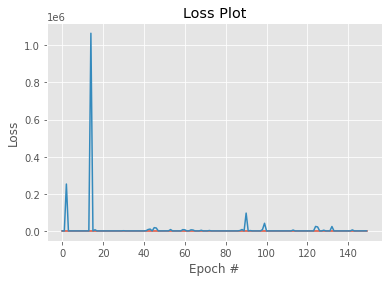

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 150), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 150), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")

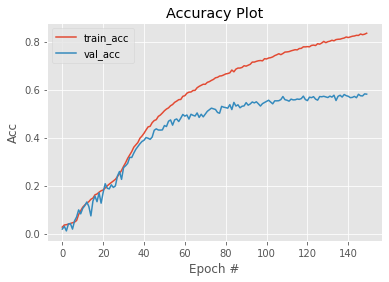

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 150), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 150), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70       100
           1       0.86      0.59      0.70       100
           2       0.74      0.26      0.39       100
           3       0.49      0.20      0.28       100
           4       0.71      0.25      0.37       100
           5       0.69      0.55      0.61       100
           6       0.61      0.67      0.64       100
           7       0.77      0.55      0.64       100
           8       0.85      0.80      0.82       100
           9       0.83      0.67      0.74       100
          10       0.61      0.33      0.43       100
          11       0.58      0.26      0.36       100
          12       0.73      0.63      0.68       100
          13       0.64      0.53      0.58       100
          14       0.72      0.52      0.60       100
          15       0.75      0.47      0.58       100
          16       0.71      0.49      0.58       100
          17       0.85    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%cd /content/drive/MyDrive/Semester 7/TKC/cifar-100-python/ 

/content/drive/MyDrive/Semester 7/TKC/cifar-100-python


In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = modelv2.to_json()
with open("modelvgg16.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelv2.save("modelvgg16.h5")
print("Saved model to disk")

Saved model to disk
